##IPL Data Analysis and Prediction
##Mentor : Prayas Jain 


Preveiwing and Processing Data

In [ ]:
import pandas as pd
import numpy as np

Importing Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IPL_intial/matches.csv')

Data Preveiwing 

In [ ]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


**Data Preprocessing**

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df.replace({'Bangalore':'Bengaluru'},regex=True,inplace=True)

In [ ]:
df['team1'].unique()
df['team2'].unique()

array(['Royal Challengers Bengaluru', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
df.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)

In [ ]:
df["city"].fillna("Dubai", inplace = True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
df_sample=df.copy()
object_cols=['team1','team2','toss_winner','toss_decision','winner','venue']
ordinal_encoder=OrdinalEncoder()
for j in object_cols:
  df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

In [ ]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,13.0,12.0,12.0,1.0,normal,0,13.0,35,0,Yuvraj Singh,28.0,AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,8.0,11.0,11.0,1.0,normal,0,11.0,0,7,SPD Smith,21.0,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,4.0,7.0,7.0,1.0,normal,0,7.0,0,10,CA Lynn,31.0,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11.0,5.0,5.0,1.0,normal,0,5.0,0,6,GJ Maxwell,13.0,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bengaluru,2017-04-08,12.0,3.0,12.0,0.0,normal,0,12.0,15,0,KM Jadhav,17.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,7.0,8.0,8.0,1.0,normal,0,8.0,0,9,HH Pandya,40.0,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,0.0,8.0,0.0,0.0,normal,0,8.0,0,6,AS Yadav,18.0,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,13.0,2.0,2.0,1.0,normal,0,2.0,0,2,RR Pant,0.0,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,2.0,0.0,0.0,1.0,normal,0,0.0,0,6,F du Plessis,0.0,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
del df['umpire3']
del df_sample['umpire3']
df_sample

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bengaluru,Delhi Daredevils,Royal Challengers Bengaluru,bat,normal,0,Royal Challengers Bengaluru,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [ ]:
df.drop(df[df['winner'].isna()].index, inplace = True)
df_sample.drop(df_sample[df_sample['winner'].isna()].index, inplace = True)

In [ ]:
df['winner'].isna().sum()

0

In [ ]:
df['city'].isna().sum()

0

The following inferences can be made from the dataset:

1. The data of IPL matches starting from the season 2008 to 2019.
2. The biggest margin of victory for the team batting first is 146 runs.
3. The biggest victory of the team batting second is by 10 wickets.
4. 75% of the victorious teams that bat first won by a margin of 19 runs.
5. 75% of the victorious teams that bat second won by a margin of 6 wickets.

# Performing 9 EDA Task

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Task 1
Maximum number of wins by any team in particular seasons

In [ ]:
teams_per_season = df_sample.groupby('season')['winner'].value_counts()
#task1_df=teams_per_season
# dict={}
# for i in range(2008,2020):
#  a=task1_df.get(i)
#  b=a.head(1)
#  dict[i]=b
# new_df=pd.DataFrame(dict)
# new_df=new_df.T
#problem persisting of removing Nan , So used below code
year=2008
win_per_season_df=pd.DataFrame(columns=['Season','Team','tot_wins'])
for items in teams_per_season.iteritems():
  if items[0][0]==year:
    #print(items)
    win_series = pd.DataFrame({
        'Season' : [items[0][0]],
        'Team' :[items[0][1]],
        'tot_wins' : [items[1]]
    })
    win_per_season_df = win_per_season_df.append(win_series)
    year+=1
win_per_season_df

,Season,Team,tot_wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


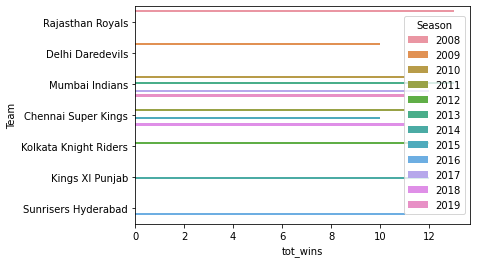

In [ ]:
sns.barplot('tot_wins', 'Team', hue='Season', data=win_per_season_df)
#sns.countplot(x='tot_wins',hue='Team',data=win_per_season_df)

Task 2 : Stadium hosted the most number of IPL matches



In [ ]:
venue_counts=df_sample['venue'].value_counts()
mat_per_venue_df=pd.DataFrame(columns=['Venue','tot_matches'])
for value in venue_counts.iteritems():
  mtch_series= pd.DataFrame({
        'Venue' : [value[0]],
        'tot_matches' : [value[1]]
    })
  mat_per_venue_df= mat_per_venue_df.append(mtch_series)
mat_per_venue_df

,Venue,tot_matches
0,Eden Gardens,77
0,Wankhede Stadium,73
0,M Chinnaswamy Stadium,71
0,Feroz Shah Kotla,66
0,"Rajiv Gandhi International Stadium, Uppal",56
0,"MA Chidambaram Stadium, Chepauk",49
0,Sawai Mansingh Stadium,47
0,"Punjab Cricket Association Stadium, Mohali",35
0,Maharashtra Cricket Association Stadium,21
0,Dr DY Patil Sports Academy,17


In [ ]:
import plotly.express as px

fig = px.bar(mat_per_venue_df, x='Venue', y='tot_matches')
fig.show()

Task 3: Which team has won the most number/percentage of win matches

In [ ]:
win_counts=df_sample['winner'].value_counts()
win_counts
team_win_count_df=pd.DataFrame(columns=['Team','tot_win'])
for value in win_counts.iteritems():
  df_win= pd.DataFrame({
        'Team' : [value[0]],
        'tot_win' : [value[1]]
    })
  team_win_count_df= team_win_count_df.append(df_win)
team_win_count_df

,Team,tot_win
0,Mumbai Indians,109
0,Chennai Super Kings,100
0,Kolkata Knight Riders,92
0,Royal Challengers Bengaluru,84
0,Kings XI Punjab,82
0,Rajasthan Royals,75
0,Delhi Daredevils,67
0,Sunrisers Hyderabad,58
0,Deccan Chargers,29
0,Rising Pune Supergiant,15


In [ ]:
import plotly.express as px
df_g = team_win_count_df
df_g['percentage'] = df_g['tot_win'].groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
px.bar(df_g, x='Team', y='tot_win', text=df_g['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

Task 4: Which player has won the most number of Man of the Match (MoM) awards?



In [ ]:
man_win_counts=df_sample['player_of_match'].value_counts()
man_win_count_df=pd.DataFrame(columns=['Player','tot_mom'])
for value in man_win_counts.iteritems():
  df_win= pd.DataFrame({
        'Player' : [value[0]],
        'tot_mom' : [value[1]]
    })
  man_win_count_df=man_win_count_df.append(df_win)
man_win_count_df

,Player,tot_mom
0,CH Gayle,21
0,AB de Villiers,20
0,RG Sharma,17
0,MS Dhoni,17
0,DA Warner,17
...,...,...
0,AP Tare,1
0,Washington Sundar,1
0,JDP Oram,1
0,TL Suman,1


Task 5: Which team has won the most tosses (Removing Bias Task pending)

In [ ]:
toss_win=df_sample['toss_winner'].value_counts()
team_toss_win_df=pd.DataFrame(columns=['Team','tot_toss_win'])
for value in toss_win.iteritems():
  df_win= pd.DataFrame({
        'Team' : [value[0]],
        'tot_toss_win' : [value[1]]
    })
  team_toss_win_df=team_toss_win_df.append(df_win)
team_toss_win_df

,Team,tot_toss_win
0,Mumbai Indians,98
0,Kolkata Knight Riders,92
0,Chennai Super Kings,89
0,Kings XI Punjab,81
0,Royal Challengers Bengaluru,80
0,Delhi Daredevils,79
0,Rajasthan Royals,78
0,Sunrisers Hyderabad,46
0,Deccan Chargers,43
0,Pune Warriors,20


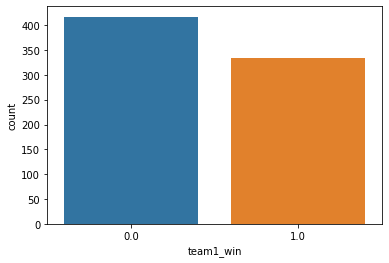

In [ ]:
df.loc[df["winner"]==df["team1"],"team1_win"]=1
df.loc[df["winner"]!=df["team1"],"team1_win"]=0

df.loc[df["toss_winner"]==df["team1"],"team1_toss_win"]=1
df.loc[df["toss_winner"]!=df["team1"],"team1_toss_win"]=0

df["team1_bat"]=0.0
df.loc[(df["team1_toss_win"]==1) & (df["toss_decision"]==0),"team1_bat"]=1.0

#Checking for the distribution of the dataset
sns.countplot(x="team1_win",data=df)
plt.show()




## Task 6 : Runs And Wickets and inferences from it

In [ ]:
runs_vict = df['win_by_runs'].value_counts()
win_by_run=pd.DataFrame(columns=['Runs','Tot_wins_run'])
for value in runs_vict.iteritems():
  run= pd.DataFrame({
        'Runs' : [value[0]],
        'Tot_wins_run' : [value[1]]
    })
  win_by_run=win_by_run.append(run)
win_by_run['Runs']=win_by_run['Runs'].sort_values(ascending=True)
win_by_run=win_by_run[79:]
winner=[]
for runs in win_by_run['Runs']:
  for index, row in df_sample.iterrows():
    if(row['win_by_runs'] == runs):
      winner.append(row['winner'])
win_by_run["Winning_team"]=winner
win_by_run
#Maximum win by run is by 146 runs and its only one time

,Runs,Tot_wins_run,Winning_team
0,98,1,Mumbai Indians
0,102,1,Mumbai Indians
0,105,1,Rajasthan Royals
0,111,1,Kings XI Punjab
0,118,1,Sunrisers Hyderabad
0,130,1,Royal Challengers Bengaluru
0,138,1,Royal Challengers Bengaluru
0,140,1,Kolkata Knight Riders
0,144,1,Royal Challengers Bengaluru
0,146,1,Mumbai Indians


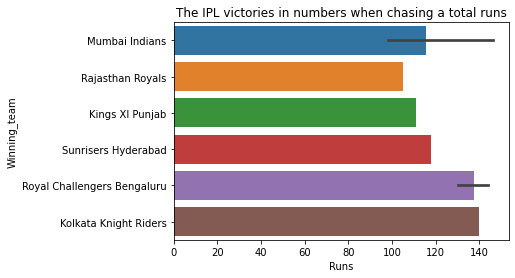

In [ ]:
plt.title('The IPL victories in numbers when chasing a total runs')
sns.barplot(x='Runs', y='Winning_team',data=win_by_run)


In [ ]:
ball_vict = df['win_by_wickets'].value_counts()
win_by_wicket=pd.DataFrame(columns=['Wickets','Tot_wins_wickets'])
for value in ball_vict.iteritems():
  wicket= pd.DataFrame({
        'Wickets' : [value[0]],
        'Tot_wins_wickets' : [value[1]]
    })
  win_by_wicket=win_by_wicket.append(wicket)
win_by_wicket['Wickets']=win_by_wicket['Wickets'].sort_values(ascending=True)
win_by_wicket
#Maximum wins by wicket is by 10 wickets and its 3 times

,Wickets,Tot_wins_wickets
0,0,346
0,1,85
0,2,80
0,3,71
0,4,54
0,5,41
0,6,37
0,7,18
0,8,11
0,9,6


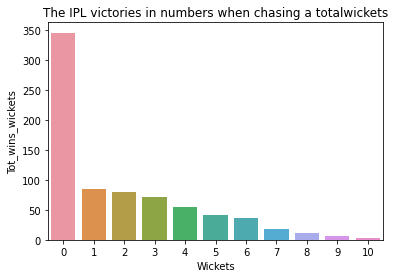

In [ ]:
plt.title('The IPL victories in numbers when chasing a totalwickets')
sns.barplot(x='Wickets', y='Tot_wins_wickets', data=win_by_wicket)

##Task 7: Most 50s and 100s scored

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/IPL Ball-by-Ball 2008-2020.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/IPL Matches 2008-2020.csv')

In [ ]:
df_3

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [ ]:
import altair as alt
import seaborn as sns

cm = sns.light_palette("blue", as_cmap=True)

##Machine Learning Task 

In [ ]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,13.0,12.0,12.0,1.0,normal,0,13.0,35,0,Yuvraj Singh,28.0,AY Dandekar,NJ Llong,1.0,0.0,0.0
1,2,2017,Pune,2017-04-06,8.0,11.0,11.0,1.0,normal,0,11.0,0,7,SPD Smith,21.0,A Nand Kishore,S Ravi,0.0,0.0,0.0
2,3,2017,Rajkot,2017-04-07,4.0,7.0,7.0,1.0,normal,0,7.0,0,10,CA Lynn,31.0,Nitin Menon,CK Nandan,0.0,0.0,0.0
3,4,2017,Indore,2017-04-08,11.0,5.0,5.0,1.0,normal,0,5.0,0,6,GJ Maxwell,13.0,AK Chaudhary,C Shamshuddin,0.0,0.0,0.0
4,5,2017,Bengaluru,2017-04-08,12.0,3.0,12.0,0.0,normal,0,12.0,15,0,KM Jadhav,17.0,NaN,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,7.0,8.0,8.0,1.0,normal,0,8.0,0,9,HH Pandya,40.0,Nanda Kishore,O Nandan,0.0,0.0,0.0
752,11412,2019,Chennai,07/05/19,0.0,8.0,0.0,0.0,normal,0,8.0,0,6,AS Yadav,18.0,Nigel Llong,Nitin Menon,0.0,1.0,1.0
753,11413,2019,Visakhapatnam,08/05/19,13.0,2.0,2.0,1.0,normal,0,2.0,0,2,RR Pant,0.0,NaN,NaN,0.0,0.0,0.0
754,11414,2019,Visakhapatnam,10/05/19,2.0,0.0,0.0,1.0,normal,0,0.0,0,6,F du Plessis,0.0,Sundaram Ravi,Bruce Oxenford,0.0,0.0,0.0


In [ ]:
prediction_df=df[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]
#dropping higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
correlation_matrix



,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.108116,-0.116832,-0.116832,0.108240
team2,-0.108116,1.000000,-0.008782,-0.008782,0.084187
team1_toss_win,-0.116832,-0.008782,1.000000,1.000000,0.050049
team1_bat,-0.116832,-0.008782,1.000000,1.000000,0.050049
venue,0.108240,0.084187,0.050049,0.050049,1.000000


In [ ]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

prediction_df.drop(columns=correlated_features)

#feature selection
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0,shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
#Scaling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
print("MSE:"+str(mean_squared_error(y_pred, y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(y_pred, y_test))))
print("MSLE:"+str(mean_squared_log_error(y_pred, y_test)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(y_pred, y_test))))
print("MAE:"+str(mean_absolute_error(y_pred, y_test)))

Accuracy of logistic regression classifier on test set: 0.6225
MSE:0.37748344370860926
RMSE:0.614396812905641
MSLE:0.18136305823402302
RMSLE:0.42586741861056127
MAE:0.37748344370860926


In [ ]:
#SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))
print("MSE:"+str(mean_squared_error(y_pred, y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(y_pred, y_test))))
print("MSLE:"+str(mean_squared_log_error(y_pred, y_test)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(y_pred, y_test))))
print("MAE:"+str(mean_absolute_error(y_pred, y_test)))

Accuracy of SVM classifier on test set: 0.6556
MSE:0.3443708609271523
RMSE:0.5868312030960456
MSLE:0.16545401803805607
RMSLE:0.40676039389062457
MAE:0.3443708609271523


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))
print("MSE:"+str(mean_squared_error(y_pred, y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(y_pred, y_test))))
print("MSLE:"+str(mean_squared_log_error(y_pred, y_test)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(y_pred, y_test))))
print("MAE:"+str(mean_absolute_error(y_pred, y_test)))

Accuracy of decision tree classifier on test set: 0.6026
MSE:0.3973509933774834
RMSE:0.6303578296313003
MSLE:0.19090848235160318
RMSLE:0.43693075235282214
MAE:0.3973509933774834


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred=randomForest.predict(X_test)
print('Accuracy of decision Random Forest on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))
print("MSE:"+str(mean_squared_error(y_pred, y_test)))
print("RMSE:"+str(np.sqrt(mean_squared_error(y_pred, y_test))))
print("MSLE:"+str(mean_squared_log_error(y_pred, y_test)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(y_pred, y_test))))
print("MAE:"+str(mean_absolute_error(y_pred, y_test)))

Accuracy of decision Random Forest on test set: 0.5828
MSE:0.41721854304635764
RMSE:0.6459245645169083
MSLE:0.20045390646918332
RMSLE:0.44772079074930543
MAE:0.41721854304635764


Deep Learning Task 

In [ ]:
# Importing Libraries 
import torch
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
prediction_df
dataset_size = len(prediction_df)
split = int(np.floor((0.05) * dataset_size))
df_train = prediction_df.iloc[split:,:]
df_test = prediction_df.iloc[:split,:]
indices = list(range(len(prediction_df)))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train1 = sc.fit_transform(df_train.iloc[:,:-1])
df_train1 = pd.DataFrame(df_train1)
df_train1
df_train1['label']  = df_train.iloc[:,-1].values/300
df_train = df_train1.copy()

df_train = pd.DataFrame(df_train)
df_train = df_train.astype(float)
display(df_train.head())

sc = StandardScaler()
df_test1 = sc.fit_transform(df_test.iloc[:,:-1])
df_test1 = pd.DataFrame(df_test1)
df_test1['label']  = df_test.iloc[:,-1].values/300
df_test = df_test1.copy()

df_test = pd.DataFrame(df_test)
df_test = df_test.astype(float)
display(df_test.head())

print('Size of training data :', df_train.shape[0])
print('Size of test data :', df_test.shape[0])



,0,1,2,3,4,label
0,-0.626533,1.055135,-0.81412,-0.81412,-0.897527,0.070000
1,1.543401,-0.923027,-0.81412,-0.81412,-0.897527,0.030000
2,0.096779,1.055135,-0.81412,-0.81412,-0.897527,0.026667
3,-0.626533,-0.923027,-0.81412,-0.81412,-0.897527,0.030000
4,-0.385429,1.302405,-0.81412,-0.81412,1.114172,0.056667


,0,1,2,3,4,label
0,1.156082,1.532541,-0.483046,-0.483046,1.145644,0.093333
1,-0.164135,1.202867,-0.483046,-0.483046,-0.872872,0.070000
2,-1.220308,-0.115832,-0.483046,-0.483046,-0.872872,0.103333
3,0.627995,-0.775181,-0.483046,-0.483046,-0.872872,0.043333
4,0.892038,-1.434530,2.070197,2.070197,1.145644,0.056667


Size of training data : 715
Size of test data : 37


### Time Series Task